In [ ]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
a=pd.read_csv("/content/drive/MyDrive/Bank+Customer+Churn+Prediction.csv")

#a.head()

print(a)


      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

In [ ]:
'''b=a.fillna(0)
print(b.iloc[0:120,5:8])'''


'b=a.fillna(0)\nprint(b.iloc[0:120,5:8])'

In [ ]:
target=a['churn']
print("target variable is:")
print("",target)
features=a.drop(columns = 'churn')
print("the features are:")
print("",features)

target variable is:
 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64
the features are:
       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male 

In [ ]:
x=a['gender']
print(x)
y=a['churn']
print(y)

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: gender, Length: 10000, dtype: object
0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64


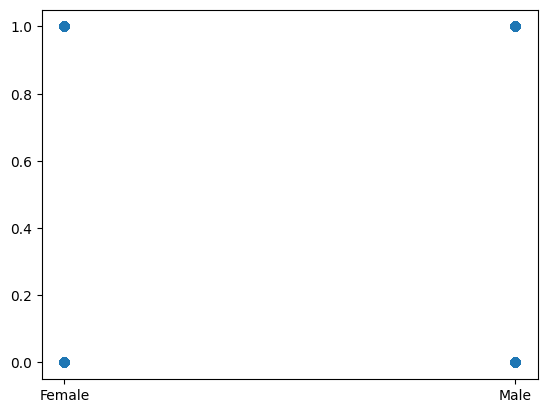

In [ ]:

import matplotlib.pyplot as plt

#(b.head())

#print(b.tail())

plt.scatter(x,y)



<BarContainer object of 10000 artists>

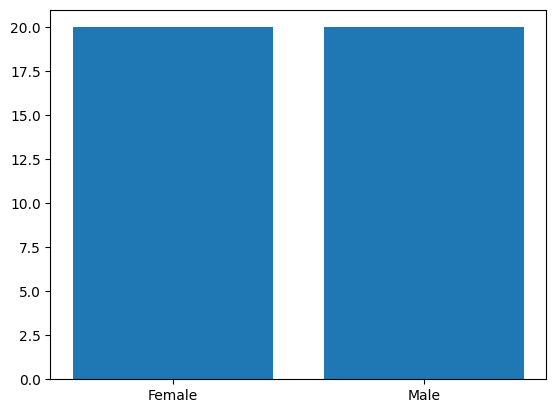

In [ ]:
plt.bar(x,20)

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 5457.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

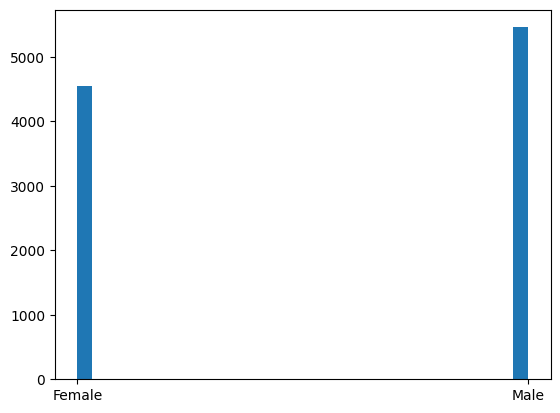

In [ ]:
plt.hist(x,30)

In [ ]:
a['gender'].replace({'Female': 1,'Male':0}, inplace=True)
#a['gender'].replace({'Male': 0}, inplace=False)
a['country'].replace({'France':0,'Spain':1,'Germany':2}, inplace=True)
print(a)

      customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       1   42       2       0.00   
1        15647311           608        1       1   41       1   83807.86   
2        15619304           502        0       1   42       8  159660.80   
3        15701354           699        0       1   39       1       0.00   
4        15737888           850        1       1   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       0   39       5       0.00   
9996     15569892           516        0       0   35      10   57369.61   
9997     15584532           709        0       1   36       7       0.00   
9998     15682355           772        2       0   42       3   75075.31   
9999     15628319           792        0       1   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0         

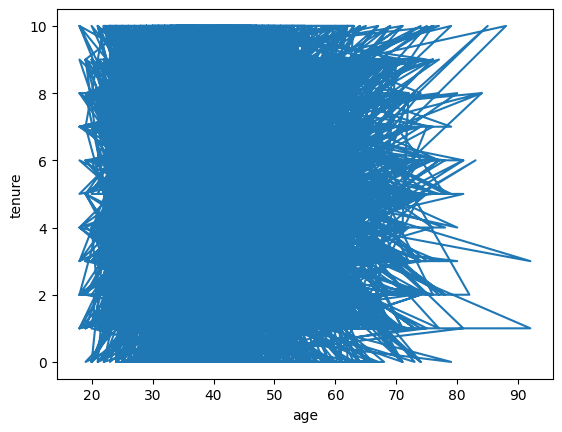

In [ ]:
x2 = a['age']
y = a['tenure']
import matplotlib .pyplot as plt
plt.xlabel('age')
plt.ylabel('tenure')
plt.plot(x2,y)
plt.show()

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(a)
nd = scaler.transform(a)
#print(nd)
a.loc[:, :] = nd
a.head()

<ipython-input-13-9c6f67aff178>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  a.loc[:, :] = nd


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.275616,0.538,0.0,1.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.326454,0.516,0.5,1.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.214421,0.304,0.0,1.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.542636,0.698,0.0,1.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,0.688778,1.000,0.5,1.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


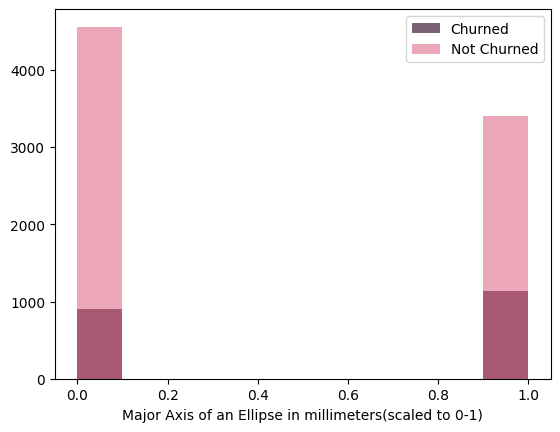

In [ ]:
import matplotlib.pyplot as plt
plt.hist ( a [ a [ 'churn' ] == 1 ] [ 'gender' ] , color = '#7A6174' , bins = 10 , label = 'Churned'  );
plt.hist ( a [  a[ 'churn' ] == 0 ] [ 'gender' ] , color = '#DB5375' , bins = 10 , label = 'Not Churned' , alpha = 0.5 ) ;
plt.xlabel ( 'Major Axis of an Ellipse in millimeters(scaled to 0-1)' )
plt.legend ( )
plt.show ( )

In [ ]:
cols = ['customer_id',	'credit_score',	'country',	'gender',	'age',	'tenure','balance',	'products_number',	'credit_card',	'active_member',	'estimated_salary']

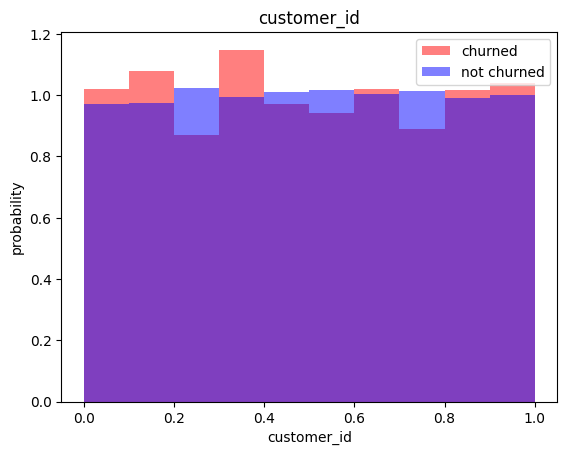

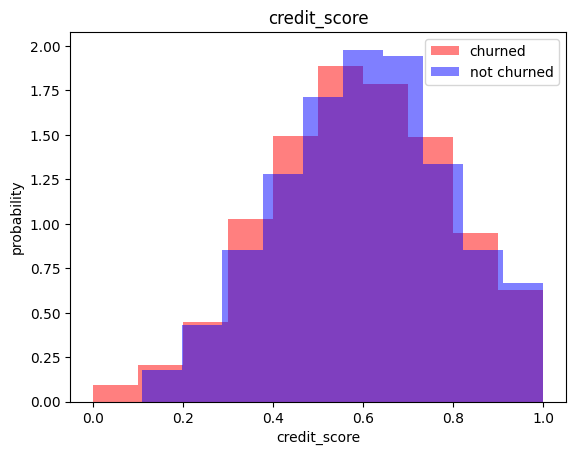

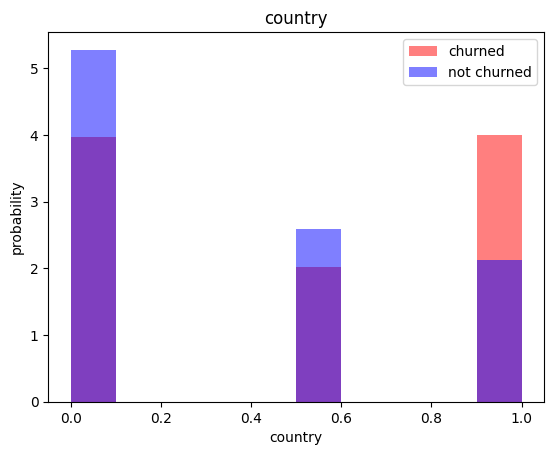

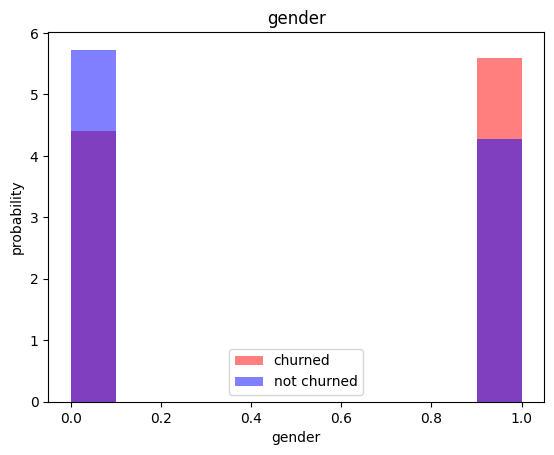

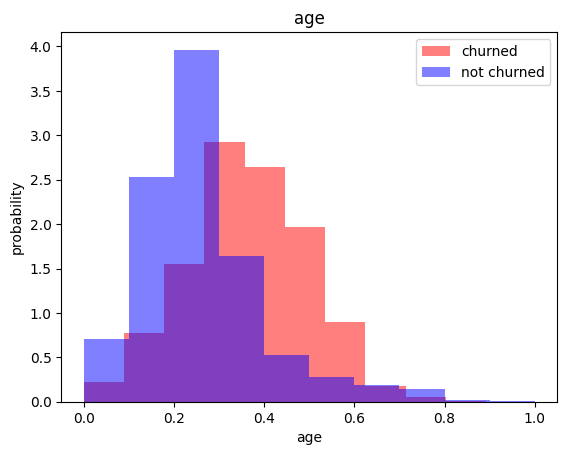

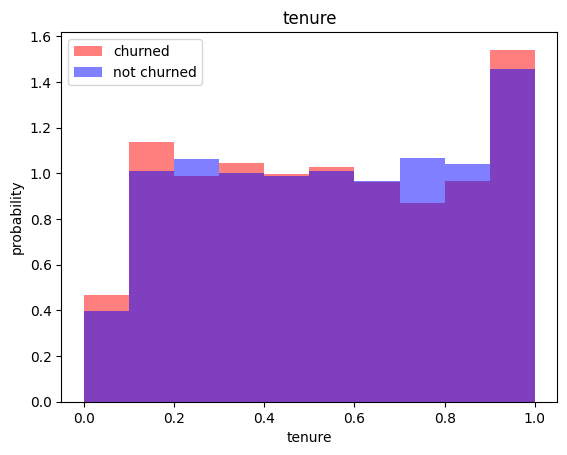

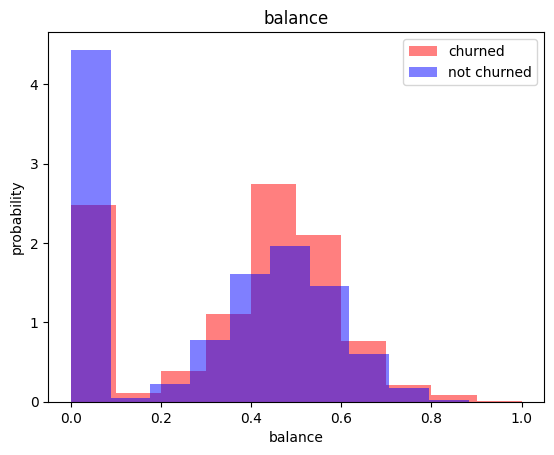

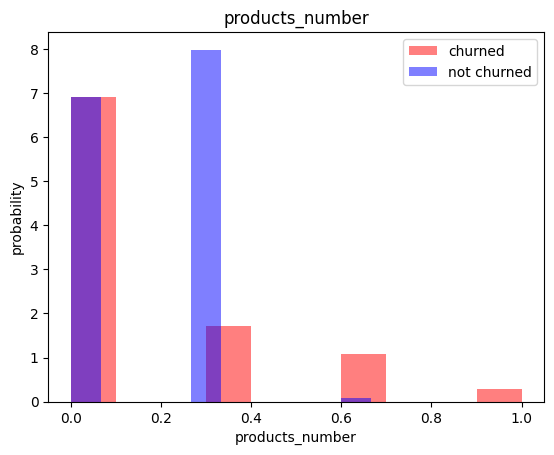

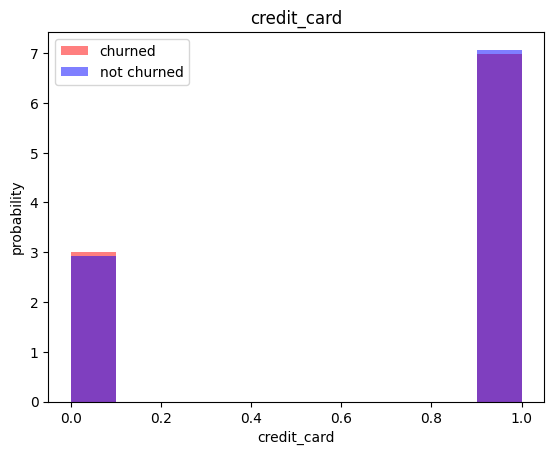

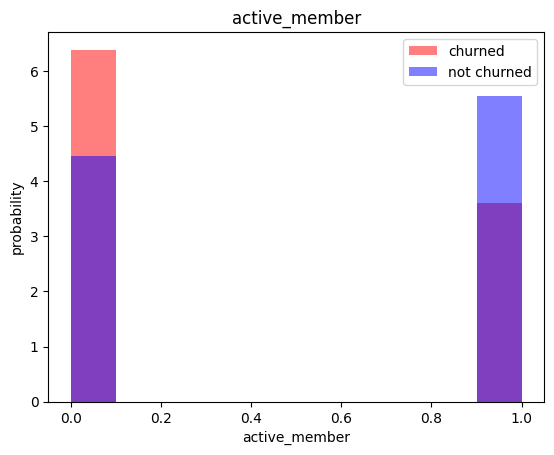

In [ ]:
for label in cols[:-1]:
    plt.hist(a[a['churn'] == 1][label],color = 'red',label = 'churned',alpha = 0.5,density = True)
    plt.hist(a[a['churn'] == 0][label],color = 'blue',label = 'not churned',alpha = 0.5,density = True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

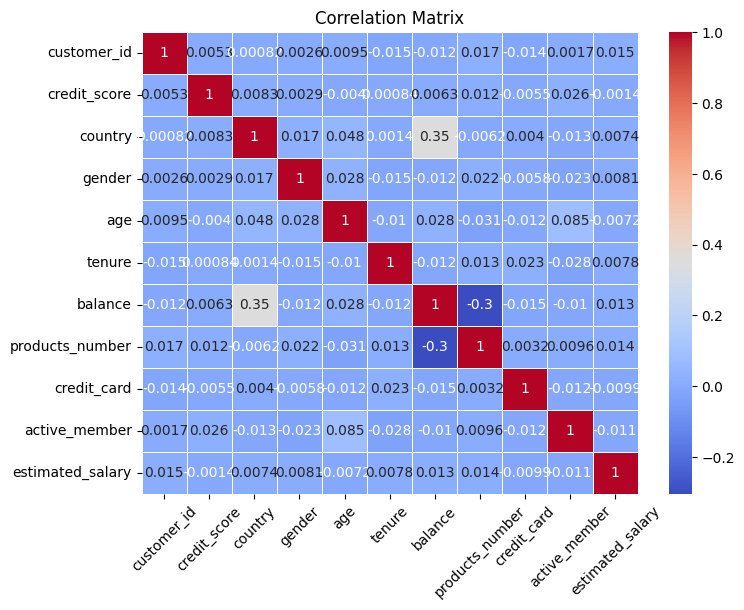

In [ ]:
data_variables = a.drop(columns = 'churn',axis = 1)
a_var= pd.DataFrame(data_variables, columns = ['customer_id',	'credit_score',	'country',	'gender',	'age',	'tenure','balance',	'products_number',	'credit_card',	'active_member',	'estimated_salary'])
correlation_matrix = a_var.corr()
# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [ ]:
import numpy as np
target = a['churn']
y = np.array(target)
print(y.shape)
features = a.drop(columns = ['credit_score','churn'],axis = 1)
print(features)
X = np.array(features)
print(X.shape)
print(y)
print(X)

(10000,)
      customer_id  country  gender       age  tenure   balance  \
0        0.275616      0.0     1.0  0.324324     0.2  0.000000   
1        0.326454      0.5     1.0  0.310811     0.1  0.334031   
2        0.214421      0.0     1.0  0.324324     0.8  0.636357   
3        0.542636      0.0     1.0  0.283784     0.1  0.000000   
4        0.688778      0.5     1.0  0.337838     0.2  0.500246   
...           ...      ...     ...       ...     ...       ...   
9995     0.162119      0.0     0.0  0.283784     0.5  0.000000   
9996     0.016765      0.0     0.0  0.229730     1.0  0.228657   
9997     0.075327      0.0     1.0  0.243243     0.7  0.000000   
9998     0.466637      1.0     0.0  0.324324     0.3  0.299226   
9999     0.250483      0.0     1.0  0.135135     0.4  0.518708   

      products_number  credit_card  active_member  estimated_salary  
0            0.000000          1.0            1.0          0.506735  
1            0.000000          0.0            1.0         

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(len(X_test))
print(len(y_test))

[[0.14166623 0.         0.         ... 1.         1.         0.89549392]
 [0.80272732 1.         0.         ... 1.         1.         0.97992998]
 [0.60519863 0.5        0.         ... 1.         0.         0.42943821]
 ...
 [0.03260143 0.         1.         ... 0.         0.         0.46108673]
 [0.96789059 0.         0.         ... 1.         0.         0.48752886]
 [0.56229274 1.         0.         ... 1.         1.         0.26787338]]
2000
2000


In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8000
8000
2000
2000


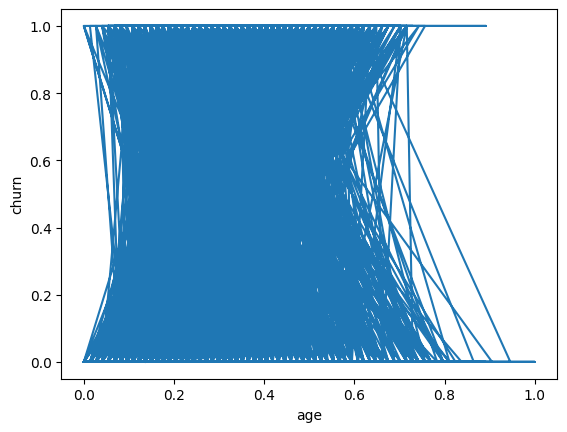

In [ ]:
x2 = a['age']
y = a['churn']
import matplotlib .pyplot as plt
plt.xlabel('age')
plt.ylabel('churn')
plt.plot(x2,y)
plt.show()

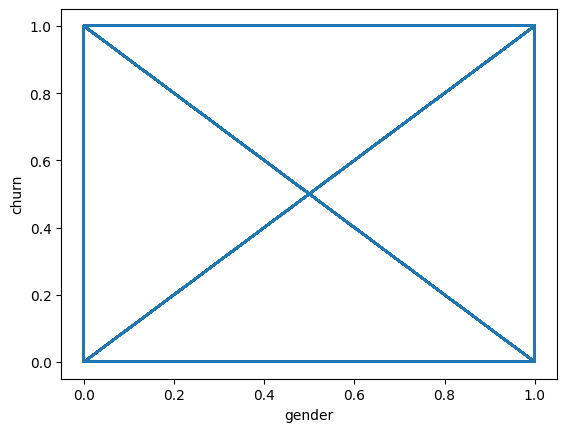

In [ ]:
x2 = a['gender']
y = a['churn']
import matplotlib .pyplot as plt
plt.xlabel('gender')
plt.ylabel('churn')
plt.plot(x2,y)
plt.show()

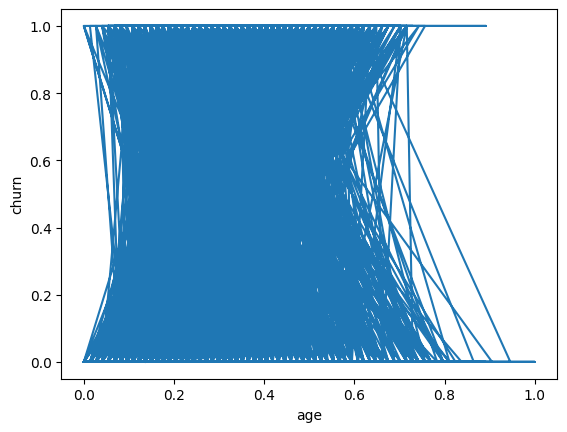

In [ ]:
x2 = a['age']
y = a['churn']
import matplotlib .pyplot as plt
plt.xlabel('age')
plt.ylabel('churn')
plt.plot(x2,y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
yp=[]
 #implementing perceptron model
def perceptron(w,x1,b):
  q=0
  for i in range(len(x1)):
    for j in range(len(w)):
      s=(x1[i][j]*w[j])+b
      s2=1/(1+np.exp(-s))
      if(s2>=0.5):
        yp.append(1)
      else:
        yp.append(0)
    q=q+1
  print(q)
  return yp
w=[]
#print("enter weights w : ")
w=[0.3,0.2,0.6,0.1,0.2,0.8,0.2,0.8,0.9,0.3]
b= float(input("enter b:"))
perceptron(w,X_train,b)







enter b:0.3
8000


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# Assuming you have the true labels for your data
# Assuming you have the true labels for your data
#true_labels = [1, 0, 1]  # Replace with your actual true labels

# Calculate accuracy
predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
total_predictions = len(y)
accuracy = predictions / total_predictions

print("Accuracy:" ,accuracy)


Accuracy: 0.2037


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
yp=[]
 #implementing perceptron model

def perceptron(w,x1,b):
    q=0
    for i in range(len(x1)):
       for j in range(len(w)):
          s=(x1[i][j]*w[j])+b
          s2=1/(1+np.exp(-s))
          if(s2>=0.5):
             yp.append(1)
          else:
             yp.append(0)
    q=q+1
    return yp
accuracy_list = []
#print("enter weights w : ")
num_iter = 8
import random
for i in range(num_iter):
    w = []
    yp=[]
    for j in range(10):
        val = random.uniform(0.0,1.0)
        w.append(val)
    #print(w)
    b = random.uniform(0.0,1.0)
    yp = perceptron(w,X_train,b)
    print(yp)
    predictions = sum(1 for y, yp in zip(y, yp) if y == yp)
    total_predictions = len(y)
    accuracy = predictions / total_predictions
    print(accuracy)
    accuracy_list.append(accuracy)
    print(accuracy_list)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

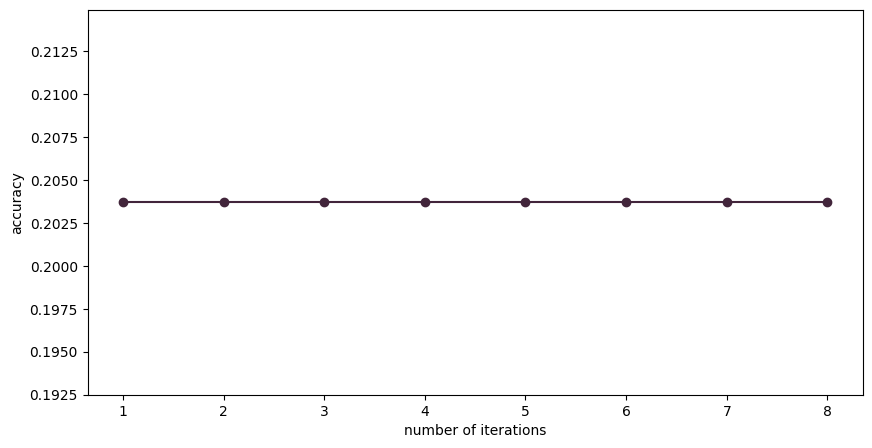

In [ ]:
num_iterations= [1,2,3,4,5,6,7,8]
plt.figure( figsize = ( 10 , 5 ) )
plt.xlabel("number of iterations")
plt.ylabel("accuracy")
# Accuracy scores plot obtained from above iterations
plt.plot(num_iterations, accuracy_list, label = 'Accuracy', marker = 'o', color = '#42253B')

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# Create a Perceptron instance and fit the training data
clf = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_PM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_PM)
print(classification_report(y_test, y_pred))

[1. 0. 1. ... 1. 0. 1.]
Accuracy: 0.512
              precision    recall  f1-score   support

         0.0       0.93      0.43      0.58      1607
         1.0       0.27      0.87      0.41       393

    accuracy                           0.51      2000
   macro avg       0.60      0.65      0.50      2000
weighted avg       0.80      0.51      0.55      2000



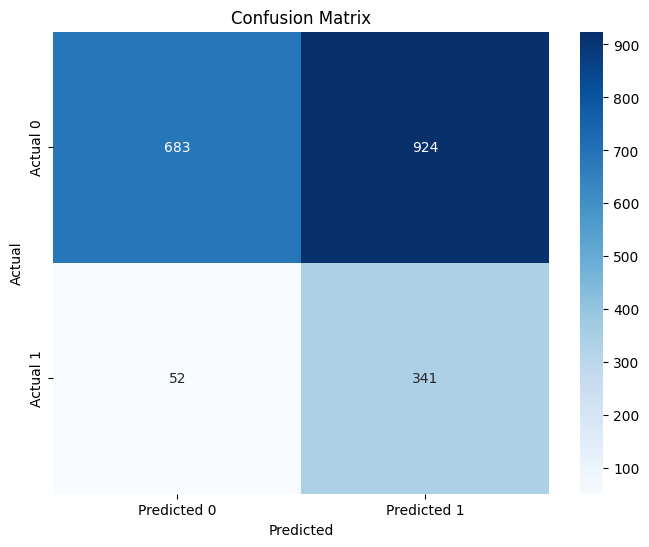

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Logisticregression()

model.weights = [0.3, -0.3, -2.9]

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cost after iteration 0: 0.6920261488323197
Cost after iteration 100: 0.6044394068913878
Cost after iteration 200: 0.5508788290066867
Cost after iteration 300: 0.5168591627531787
Cost after iteration 400: 0.4943807274087164
Cost after iteration 500: 0.47899165917080255
Cost after iteration 600: 0.46812936325169235
Cost after iteration 700: 0.46026037230286465
Cost after iteration 800: 0.4544324038125137
Cost after iteration 900: 0.45003391941322685
 [0.6920261488323197, 0.6909108738913372, 0.6898013256226798, 0.6886974740166173, 0.6875992891687935, 0.6865067412809851, 0.6854198006618372, 0.6843384377275752, 0.6832626230026951, 0.6821923271206279, 0.6811275208243837, 0.680068174967171, 0.6790142605129967, 0.6779657485372412, 0.6769226102272135, 0.6758848168826849, 0.6748523399164003, 0.6738251508545711, 0.6728032213373443, 0.6717865231192545, 0.6707750280696532, 0.6697687081731211, 0.6687675355298575, 0.6677714823560545, 0.6667805209842491, 0.6657946238636578, 0.6648137635604939, 0.66383

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#Importing logistic regression function from scikit learn directly

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:",accuracy_LR)
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy is: 0.8165
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.21      0.31       393

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000



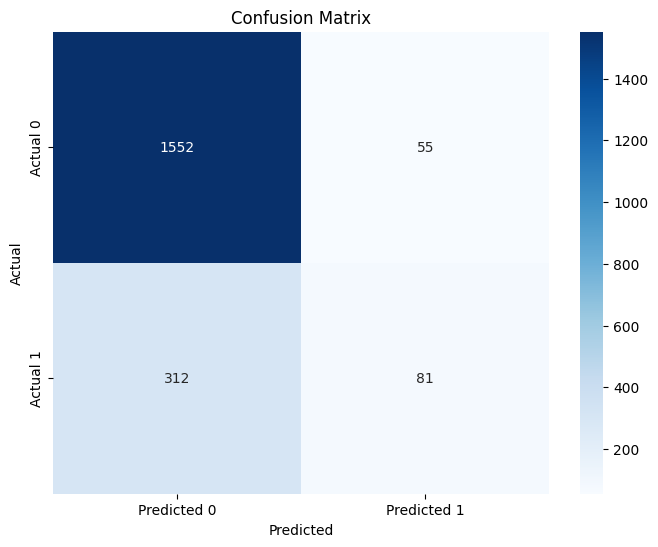

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#SVM INBUILT FUNCTION
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)
print(y_pred)
# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy: 0.8035
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


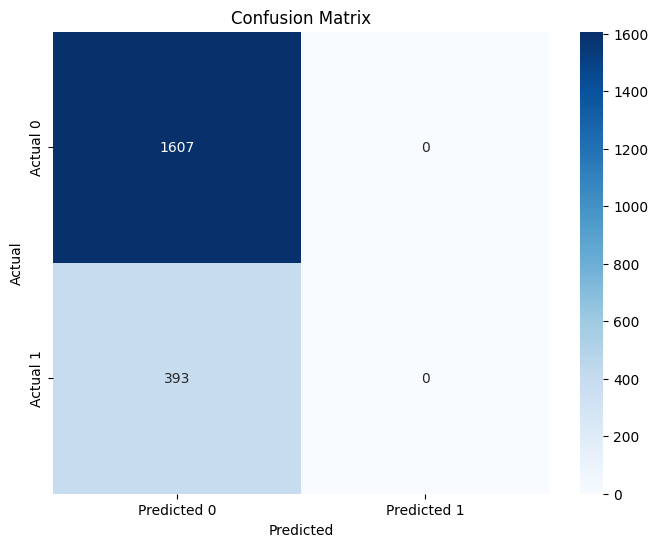

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**PCA**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=6)
print(scaled_features)

[[-0.78321342 -0.9025865   1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.60653412  0.301665    1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-0.99588476 -0.9025865   1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [-1.47928179 -0.9025865   1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [-0.11935577  1.50591651 -0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [-0.87055909 -0.9025865   1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [ ]:
reduced_features = pca.fit_transform(scaled_features)
print(reduced_features)

[[ 0.85926791  1.02502267 -0.6211761   0.13041508  1.2543787   0.39593796]
 [-0.76343806  1.48673982  0.35910341 -1.08159072  1.221954    1.21220412]
 [ 0.69930459 -0.97769419  1.07217614  1.82924218  0.45739193  0.6594275 ]
 ...
 [ 0.92104079  0.59986201 -1.0417992  -0.0954189   1.3656286   1.881933  ]
 [-0.47654187 -0.48052483  0.34840598  0.46762142 -0.09826988 -0.85382998]
 [-0.42794621 -1.35794999 -0.72760597 -0.13554627  2.07427561 -0.12266251]]


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy is :",accuracy)
print(classification_report(y_test, y_pred))

[0 0 0 ... 0 0 0]
Accuracy is : 0.813
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1607
           1       0.56      0.37      0.44       393

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000



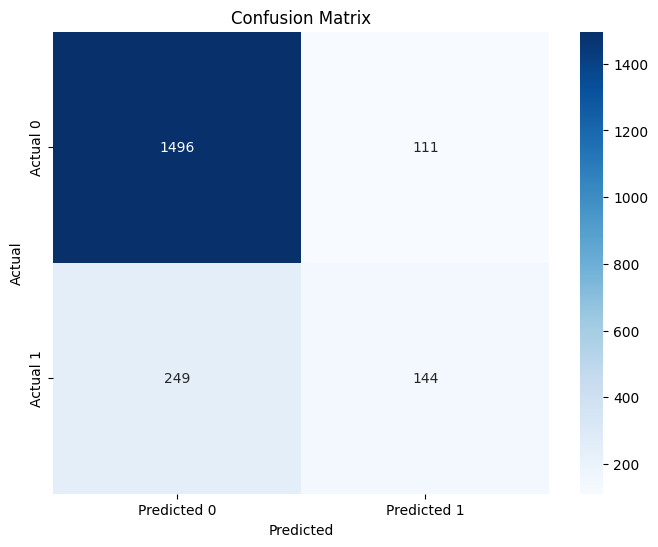

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**BOOTSTRAP**

In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = LogisticRegression()
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_lgr = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_lgr.append(score)

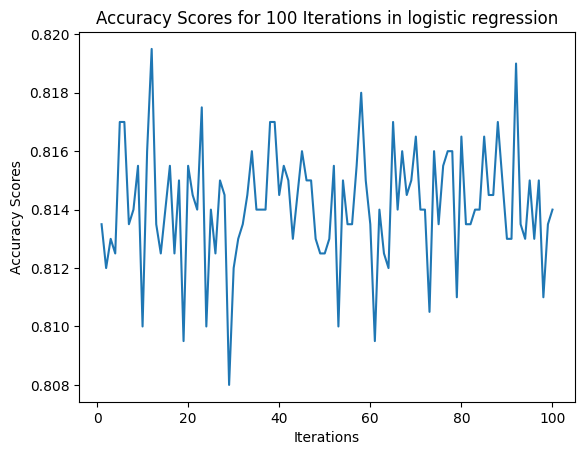

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_lgr)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in logistic regression")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_per = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_per.append(score)

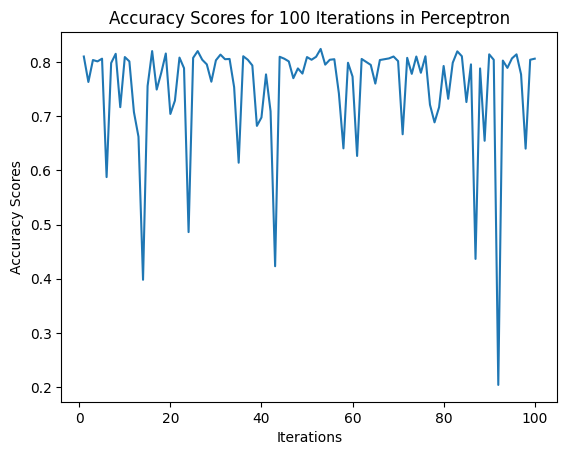

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_per)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in Perceptron")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = SVC(kernel='linear', C=1, random_state=42)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_svc= list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_svc.append(score)

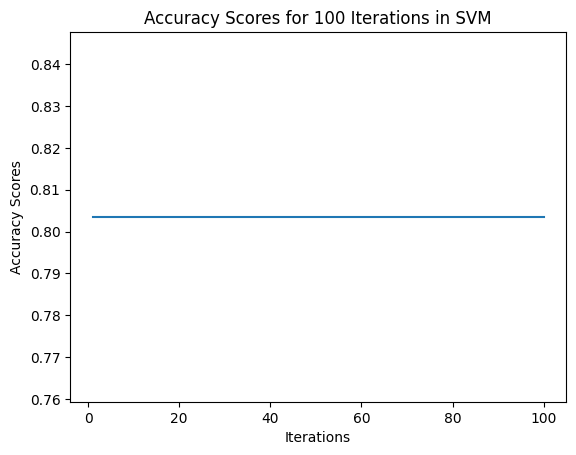

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_svc)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in SVM")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

In [ ]:
from sklearn.utils import resample
# Define the machine learning model
model = KNeighborsClassifier(n_neighbors=3)
# Define the number of bootstrap iterations
n_iterations = 100
# Perform the bootstrap
scores_knn = list()
for i in range(n_iterations):
    # Resample the training dataset
    X_sample, y_sample = resample(X_train, y_train)
    # Fit the model on the resampled dataset
    model.fit(X_sample, y_sample)
    # Evaluate the model on the testing dataset
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores_knn.append(score)

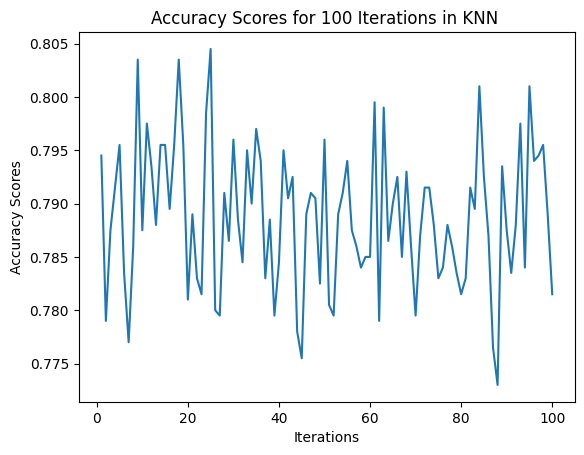

In [ ]:
iterations = [i for i in range(1, 101)]
plt.plot(iterations, scores_knn)
# Add a title to the graph
plt.title("Accuracy Scores for 100 Iterations in KNN ")
# Label the x-axis
plt.xlabel("Iterations")
# Label the y-axis
plt.ylabel("Accuracy Scores")
# Display the graph
plt.show()

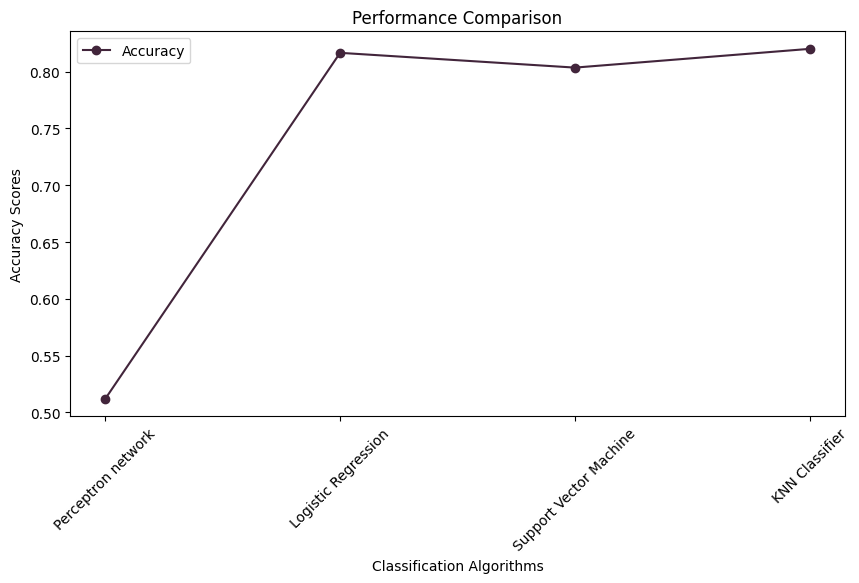

In [ ]:
algorithm_names = ['Perceptron network','Logistic Regression','Support Vector Machine','KNN Classifier']
accuracy_scores = [ accuracy_PM , accuracy_LR , accuracy_SVM,accuracy_KNN ]
# Plotting the scores
plt.figure( figsize = ( 10 , 5 ) )
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show()

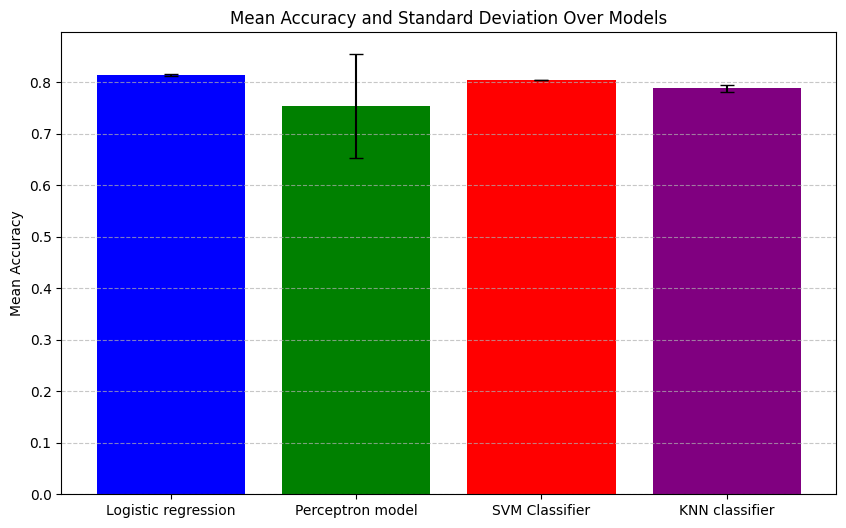

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a list of model names
model_names = ['Logistic regression', 'Perceptron model', 'SVM Classifier','KNN classifier']

# Calculate the mean and standard deviation for each model's accuracy scores
mean_scores = [np.mean(scores) for scores in [scores_lgr, scores_per,scores_svc,scores_knn]]
std_scores = [np.std(scores) for scores in [scores_lgr,scores_per,scores_svc,scores_knn]]

# Plot the mean accuracy scores over models
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_scores, yerr=std_scores, capsize=5, color=['blue', 'green', 'red','purple'])
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy and Standard Deviation Over Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Calculate the confidence interval in logistic regression
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_lgr, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_lgr, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_lgr)
std_accuracy = np.std(scores_lgr)

print(f"Mean Accuracy(logistic regression): {mean_accuracy:.2f}")
print(f"Standard Deviation(logistic regression): {std_accuracy:.2f}")          #mean standard deviation code

95.0 confidence interval 81.1% and 81.7%
Mean Accuracy(logistic regression): 0.81
Standard Deviation(logistic regression): 0.00


In [ ]:
# Calculate the confidence interval in perceptron learning
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_per, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_per, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_per)
std_accuracy = np.std(scores_per)

print(f"Mean Accuracy(perceptron learning): {mean_accuracy:.2f}")
print(f"Standard Deviation(perceptron learning): {std_accuracy:.2f}")

95.0 confidence interval 42.9% and 82.0%
Mean Accuracy(perceptron learning): 0.75
Standard Deviation(perceptron learning): 0.10


In [ ]:
# Calculate the confidence interval in SVM
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_svc, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_svc, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_svc)
std_accuracy = np.std(scores_svc)

print(f"Mean Accuracy(SVM): {mean_accuracy:.2f}")
print(f"Standard Deviation(SVM): {std_accuracy:.2f}")

95.0 confidence interval 80.3% and 80.3%
Mean Accuracy(SVM): 0.80
Standard Deviation(SVM): 0.00


In [ ]:
# Calculate the confidence interval in KNN
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores_knn, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores_knn, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

mean_accuracy = np.mean(scores_knn)
std_accuracy = np.std(scores_knn)

print(f"Mean Accuracy(KNN): {mean_accuracy:.2f}")
print(f"Standard Deviation(KNN): {std_accuracy:.2f}")

95.0 confidence interval 77.7% and 80.2%
Mean Accuracy(KNN): 0.79
Standard Deviation(KNN): 0.01
